## Frad Detection dataset EDA
Author: Lakshmi Girija Mangipudi

My observations:

- No duplicate rows.
- Columns 'purchase_time' and 'signup_time' have been converted to datetime data type.
- Additional information like year, month, day of month, hour of day and week of year are extracted from both 'purchase_time' and 'signup_time'.
- 'purchase_Month', 'purchase_WeekOfYear', 'signup_Month' have good correlation with target variable.
- 'purchase_Month', 'purchase_WeekOfYear', 'signup_Month', 'signup_WeekOfYear' are highly correlated.
- 'user_id' is unique (not required)
- The columns 'purchase_id' and 'age' do not have much correlation with the target variable.
- In this dataset, around 10% of the transactions are fraud.
- Around 40% of fraud transactions were using Chrome browser.
- The transactions from Ads and SEO have around 40% fraud transactions.
- So, transactions using Chrome browser from Ads and Searches have 15% fraud transactions.
- Both Male and Female are equally involved in frauds.
- 40% of the fraudsters belong to United States

## Mapping IP address to Country

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv('Fraud_Data.csv')
ip_address = pd.read_csv("IpAddress_to_Country.csv")

In [ ]:
df.head(10)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0
5,159135,2015-05-21 06:03:03,2015-07-09 08:05:14,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,2.809315e+09,0
6,50116,2015-08-01 22:40:52,2015-08-27 03:37:57,11,IWKVZHJOCLPUR,Ads,Chrome,F,19,3.987484e+09,0
7,360585,2015-04-06 07:35:45,2015-05-25 17:21:14,27,HPUCUYLMJBYFW,Ads,Opera,M,34,1.692459e+09,0
8,159045,2015-04-21 23:38:34,2015-06-02 14:01:54,30,ILXYDOZIHOOHT,SEO,IE,F,43,3.719094e+09,0
9,182338,2015-01-25 17:49:49,2015-03-23 23:05:42,62,NRFFPPHZYFUVC,Ads,IE,M,31,3.416747e+08,0


In [ ]:
def get_country(ip):
    for low,up in zip(ip_address.loc[:,"lower_bound_ip_address"],ip_address.loc[:,"upper_bound_ip_address"]):
        if ip>=low:
            if ip<=up:
                country = ip_address[ip_address["lower_bound_ip_address"]==low]["country"]
                return str(country.values[0])
        else:
            return "Others"

In [ ]:
country = []
for ip in df["ip_address"]:
    count = get_country(ip)
    country.append(count)

In [ ]:
df["country"] = country_names

In [ ]:
df.head(10)

In [ ]:
df.to_csv("Fraud_detection.csv", index=False, header=True)

## EDA

In [ ]:
pip install xgboost

In [ ]:
pip install imblearn

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn import preprocessing
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import random
import pickle
from sklearn.metrics import roc_auc_score

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
df = pd.read_csv("Fraud_detection.csv", parse_dates=["signup_time", "purchase_time"])
rows, cols = df.shape

In [ ]:
df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,None
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


In [ ]:
df.signup_time.mean()

Timestamp('2015-04-20 00:56:09.511313920')

In [ ]:
df.purchase_time.mean()

Timestamp('2015-06-16 02:56:38.759956736')

In [ ]:
True in df.isna().sum()>0

False

In [ ]:
df.device_id.nunique()

137956

In [ ]:
df.country.nunique()

182

In [ ]:
df.source.unique()

array(['SEO', 'Ads', 'Direct'], dtype=object)

In [ ]:
df.browser.unique()

array(['Chrome', 'Opera', 'Safari', 'IE', 'FireFox'], dtype=object)

In [ ]:
df.sex.unique()

array(['M', 'F'], dtype=object)

In [ ]:
country = df.country.unique()

In [ ]:
df.isna().sum()

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
country           0
dtype: int64

In [ ]:
df.describe()

,user_id,purchase_value,age,ip_address,class
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


In [ ]:
df.describe(include=['O'])

,device_id,source,browser,sex,country
count,151112,151112,151112,151112,151112
unique,137956,3,5,2,182
top,ZUSVMDEZRBDTX,SEO,Chrome,M,United States
freq,20,60615,61432,88293,58049


In [ ]:
# no dulicates
df.duplicated().sum()
# df.drop_duplicates(inplace=True)

0

In [ ]:
# user ids are unique
df.user_id.nunique() == rows

True

In [ ]:
# device ids are not unique
df.device_id.nunique() == rows

False

In [ ]:
df['time_difference'] = (df["purchase_time"] - df["signup_time"])/np.timedelta64(1,'D')

In [ ]:
print("Total fraud transactions: ", df['class'].sum())
print("Total transactions: ", rows)
# percentage of fraud
print("Percentage of fraud transactions: ", (df['class'].sum()/rows)*100)

Total fraud transactions:  14151
Total transactions:  151112
Percentage of fraud transactions:  9.364577267192546


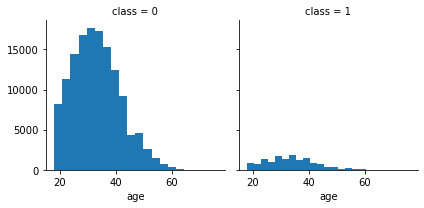

In [ ]:
# f = plt.figure(figsize=(50, 10))

# distribution of age
g = sns.FacetGrid(df, col='class')
g.map(plt.hist, 'age', bins=20)

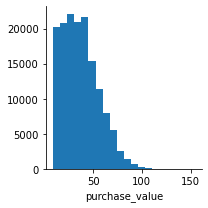

In [ ]:
g = sns.FacetGrid(df)
g.map(plt.hist, 'purchase_value', bins=20)

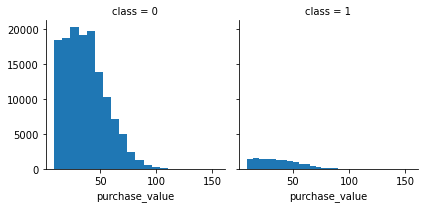

In [ ]:
# distribution of purchase value
g = sns.FacetGrid(df, col='class')
g.map(plt.hist, 'purchase_value', bins=20)

In [ ]:
count = df['sex'].value_counts()
print("Total of Female: ", count[1])
print("Percentage of Female: ", (count[1]/rows)*100)
print("Total of Male: ", count[0])
print("Percentage of Male: ", (count[0]/rows)*100)

Total of Female:  62819
Percentage of Female:  41.57115252263222
Total of Male:  88293
Percentage of Male:  58.42884747736778


In [ ]:
total = pd.DataFrame(df.groupby(['sex'])['class'].sum())
total['percentage'] = (total['class']/df["class"].sum())*100
total.drop('class', axis=1, inplace=True)
total

,percentage
sex,
F,40.399972
M,59.600028


In [ ]:
# percentage of fraud for each browser
browser = pd.DataFrame(df.groupby(['browser'])["class"].sum())
browser['percentage'] = (browser['class']/df["class"].sum())*100
browser.drop('class', axis=1, inplace=True)
browser

,percentage
browser,
Chrome,42.887428
FireFox,16.550067
IE,22.521377
Opera,2.317857
Safari,15.723270


In [ ]:
# percentage of fraud for each source
source = pd.DataFrame(df.groupby(['source'])["class"].sum())
source['percentage'] = (source['class']/df["class"].sum())*100
source.drop('class', axis=1, inplace=True)
source

,percentage
source,
Ads,38.958377
Direct,22.796975
SEO,38.244647


In [ ]:
# percentage of fraud for each source and browser
group = pd.DataFrame(df.groupby(['source', 'browser'])["class"].sum())
group['percentage'] = (group['class']/df["class"].sum())*100
group.drop('class', axis=1, inplace=True)
group

percentage
source browser            
Ads    Chrome    17.037665
       FireFox    6.458907
       IE         8.720232
       Opera      0.706664
       Safari     6.034909
Direct Chrome    10.607024
       FireFox    3.088121
       IE         5.292912
       Opera      0.579464
       Safari     3.229454
SEO    Chrome    15.242739
       FireFox    7.003039
       IE         8.508233
       Opera      1.031729
       Safari     6.458907

C:\Users\Sastry\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Sastry\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Sastry\anaconda3\lib\site-packages\seaborn\axisgrid.py:650: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


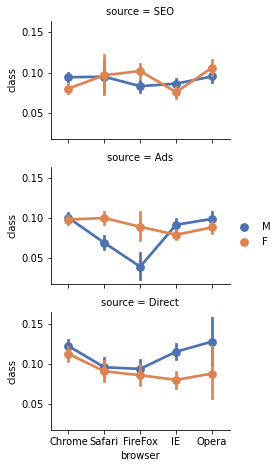

In [ ]:
grid = sns.FacetGrid(df, row='source', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'browser', 'class', 'sex', palette='deep')
grid.add_legend()

In [ ]:
country = pd.DataFrame(df.groupby(['country'])["class"].sum())
country['percentage'] = (country['class']/df["class"].sum())*100
country.drop('class', axis=1, inplace=True)
country.sort_values('percentage', ascending=False)[:10]

,percentage
country,
United States,39.226910
None,13.306480
China,7.370504
Japan,5.052646
United Kingdom,3.370787
Korea Republic of,2.685323
Canada,2.459190
France,2.119992
Brazil,1.907992


In [ ]:
device = pd.DataFrame(df.groupby(['device_id'])["class"].sum())
device['percentage'] = (device['class']/df["class"].sum())*100
device.drop('class', axis=1, inplace=True)
device.sort_values('percentage', ascending=False)[:5]

,percentage
device_id,
NGQCKIADMZORL,0.134266
EQYVNEGOFLAWK,0.134266
CQTUVBYIWWWBC,0.134266
KIPFSCNUGOLDP,0.134266
ZUSVMDEZRBDTX,0.134266


In [ ]:
# dropping unecessary columns
df.drop(["user_id", "ip_address", "purchase_time", "signup_time", "device_id", "purchase_value"], axis=1, inplace=True)

In [ ]:
corr_matrix = df.corr()
corr_matrix['class']

age                0.006624
class              1.000000
time_difference   -0.257888
Name: class, dtype: float64

In [ ]:
X = df.drop('class', axis=1)
y = df['class']

In [ ]:
X.columns

Index(['source', 'browser', 'sex', 'age', 'country', 'time_difference'], dtype='object')

In [ ]:
X.source.mode()

0    SEO
dtype: object

In [ ]:
X.browser.mode()

0    Chrome
dtype: object

In [ ]:
X.sex.mode()

0    M
dtype: object

In [ ]:
X.age.mean()

33.14070358409656

In [ ]:
X.country.mode()

0    United States
dtype: object

In [ ]:
X.time_difference.median()

57.01788773148148

## Handling Imbalanced data with SMOTE 

In [ ]:
def smote(X_train, y_train):
  sm = SMOTE(random_state=2)
  X, y = sm.fit_sample(X_train, y_train.ravel())

  return X, y

## Label Encoding

In [ ]:
def label_encoding(X):
    categoricals = X.select_dtypes(include='object')
    categoricals = categoricals.astype(str)
   
    label_ = preprocessing.LabelEncoder()
    categoricals = categoricals.apply(label_.fit_transform)
    categoricals.reset_index(drop=True, inplace=True)
    
    original_numeric = X.select_dtypes(include='number')
    original_numeric.reset_index(drop=True, inplace=True)
    
    X = pd.concat([original_numeric, categoricals], axis=1)
    return X

## One hot encoding

In [ ]:
def one_hot_encoding(X):
    categoricals = X.select_dtypes(include='object')
    categoricals = categoricals.astype(str)
   
    label_ = preprocessing.LabelEncoder()
    categoricals = categoricals.apply(label_.fit_transform)
    pickle.dump(label_, open('label.pkl','wb'))

    oh = preprocessing.OneHotEncoder()
    label_encoding = categoricals['country']
    categoricals.drop(['country'], axis=1, inplace=True)
    encoded_data = oh.fit_transform(categoricals)
    pickle.dump(oh, open('one_hot.pkl','wb'))
    encoded_data = pd.DataFrame(encoded_data.todense())
    encoded_data.reset_index(drop=True, inplace=True)
    categoricals.reset_index(drop=True, inplace=True)
    
    original_numeric = X.select_dtypes(include='number')
    original_numeric.reset_index(drop=True, inplace=True)
    
    X = pd.concat([original_numeric, encoded_data, label_encoding], axis=1)
    return X

## LDA

In [ ]:
def x_lda(X):
    lda = LDA()
    X = lda.fit_transform(X, y)
    return X

## PCA

In [ ]:
X = one_hot_encoding(X)

In [ ]:
pca = PCA()
principalComponents = pca.fit_transform(X)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') 
plt.title('Explained Variance')
plt.show()

In [ ]:
def x_pca(X):
    pca = PCA(n_components=6)
    pca.fit(X)
    pickle.dump(pca, open('pca.pkl','wb'))
    X = pca.transform(X)

    return X

## Grid Search

In [ ]:
def grid_search(model, parameters={}):
  clf = GridSearchCV(model, parameters, scoring='f1')
  
  print("{}: ".format(type(model)))
  clf.fit(Xl_train, yl_train)
  y_pred = clf.predict(Xl_test)
  print("F1 score for LDA: {}".format(f1_score(yl_test, y_pred)))

  clf.fit(Xp_train, yp_train)
  y_pred = clf.predict(Xp_test)
  print("F1 score for PCA: {}".format(f1_score(yp_test, y_pred)))

  return clf.best_params_

## Label Encoding - LDA and PCA

In [ ]:
X_label = label_encoding(X)

Xl = x_lda(X_label) # lda
Xp = x_pca(X_label) # pca

In [ ]:
Xl_train, Xl_test, yl_train, yl_test = train_test_split(Xl, y, test_size=0.40, random_state=42)
Xp_train, Xp_test, yp_train, yp_test = train_test_split(Xp, y, test_size=0.40, random_state=42)

In [ ]:
Xl_train, yl_train = smote(Xl_train, yl_train)
Xp_train, yp_train = smote(Xp_train, yp_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
best = []

In [ ]:
#Logistic Regression
parameters = {'class_weight': ["balanced"]}
model = LogisticRegression()
best.append(grid_search(model, parameters))

<class 'sklearn.linear_model._logistic.LogisticRegression'>: 
F1 score for LDA: 0.2721311475409836
F1 score for PCA: 0.24158459912090358


In [ ]:
#Decision Tree Classifier
parameters = {'max_depth': [10, 40, 50, 100, None]}
model = DecisionTreeClassifier()
best.append(grid_search(model, parameters))

<class 'sklearn.tree._classes.DecisionTreeClassifier'>: 
F1 score for LDA: 0.3126173809117296
F1 score for PCA: 0.4923030485964383


In [ ]:
#Naive Bayes
parameters = {}
model = GaussianNB()
best.append(grid_search(model, parameters))

<class 'sklearn.naive_bayes.GaussianNB'>: 
F1 score for LDA: 0.2806067943878641
F1 score for PCA: 0.27314655469126453


In [ ]:
#Random Forest
parameters = {'n_estimators': [50, 100, 150], 'max_depth': [None], 'n_jobs': [-1]}
model = RandomForestClassifier()
best.append(grid_search(model, parameters))

<class 'sklearn.ensemble._forest.RandomForestClassifier'>: 
F1 score for LDA: 0.3138967377343951
F1 score for PCA: 0.5802650957290133


In [ ]:
#KNN Classifier
parameters = {'n_neighbors': [2, 3, 4]}
model = KNeighborsClassifier()
best.append(grid_search(model, parameters))

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>: 
F1 score for LDA: 0.3459980713596914
F1 score for PCA: 0.47365439093484424


In [ ]:
#XGBoost
parameters = {'n_estimators':[50, 100, 150], 'n_jobs': [-1]}
model = XGBClassifier()
best.append(grid_search(model, parameters))

<class 'xgboost.sklearn.XGBClassifier'>: 
F1 score for LDA: 0.5762588620250862
F1 score for PCA: 0.6806075280651552


## One Hot encoding - LDA and PCA

In [ ]:
X_one = one_hot_encoding(X)

Xl = x_lda(X_one) # lda
Xp = x_pca(X_one) # pca

In [ ]:
Xl_train, Xl_test, yl_train, yl_test = train_test_split(Xl, y, test_size=0.40, random_state=42)
Xp_train, Xp_test, yp_train, yp_test = train_test_split(Xp, y, test_size=0.40, random_state=42)

In [ ]:
Xl_train, yl_train = smote(Xl_train, yl_train)
Xp_train, yp_train = smote(Xp_train, yp_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
best_1 = []

In [ ]:
#Logistic Regression
parameters = {'class_weight': ["balanced"]}
model = LogisticRegression()
best_1.append(grid_search(model, parameters))

<class 'sklearn.linear_model._logistic.LogisticRegression'>: 
F1 score for LDA: 0.27085793678360537
F1 score for PCA: 0.27061677061677064


In [ ]:
#Decision Tree Classifier
parameters = {'max_depth': [10, 40, 50, 100, None]}
model = DecisionTreeClassifier()
best_1.append(grid_search(model, parameters))

<class 'sklearn.tree._classes.DecisionTreeClassifier'>: 
F1 score for LDA: 0.3598777265426662
F1 score for PCA: 0.5415453143738223


In [ ]:
#Naive Bayes
parameters = {}
model = GaussianNB()
best_1.append(grid_search(model, parameters))

<class 'sklearn.naive_bayes.GaussianNB'>: 
F1 score for LDA: 0.27719714111266747
F1 score for PCA: 0.27894832275611964


In [ ]:
#Random Forest
parameters = {'n_estimators': [50, 100, 150], 'max_depth': [None], 'n_jobs': [-1]}
model = RandomForestClassifier()
best_1.append(grid_search(model, parameters))

<class 'sklearn.ensemble._forest.RandomForestClassifier'>: 
F1 score for LDA: 0.31352363125877397
F1 score for PCA: 0.6668132834836156


In [ ]:
#KNN Classifier
parameters = {'n_neighbors': [2, 3, 4]}
model = KNeighborsClassifier()
best_1.append(grid_search(model, parameters))

<class 'sklearn.neighbors._classification.KNeighborsClassifier'>: 
F1 score for LDA: 0.3418860698898995
F1 score for PCA: 0.4908746686861038


In [ ]:
#XGBoost
parameters = {'n_estimators':[50, 100, 150], 'n_jobs': [-1]}
model = XGBClassifier()
best_1.append(grid_search(model, parameters))

<class 'xgboost.sklearn.XGBClassifier'>: 
F1 score for LDA: 0.54265565875473
F1 score for PCA: 0.6951317758084935


## Genetic Algorithms

In [ ]:
model = XGBClassifier(n_estimators=150, n_jobs=-1)
model.fit(Xp_train, yp_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=150, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
model.classes_

array([0, 1])

In [ ]:
model.save_model('xgb.model')

In [ ]:
#defining various steps required for the genetic algorithm
def initilization_of_population(size, n_feat):
    population = []
    for i in range(size):
        # creating a list with 0 and 1, features are selected when there is 1
        chromosome = np.ones(n_feat, dtype=np.bool)
        chromosome[:int(0.3*n_feat)] = False
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

def fitness_score(population, X_train, X_test, y_train, y_test):
    scores = []
    for chromosome in population:
        model.fit(X_train.iloc[:, chromosome], y_train)
        predictions = model.predict(X_test.iloc[:,chromosome])
        scores.append(f1_score(y_test,predictions))
    scores, population = np.array(scores), np.array(population) 
    inds = np.argsort(scores)
    return list(scores[inds][::-1]), list(population[inds,:][::-1])

def selection(pop_after_fit, n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen

def crossover(pop_after_sel):
    population_nextgen = pop_after_sel
    for i in range(len(pop_after_sel)):
        child = pop_after_sel[i]
        child[3:7] = pop_after_sel[(i+1)%len(pop_after_sel)][3:7]
        population_nextgen.append(child)
    return population_nextgen

def mutation(pop_after_cross, mutation_rate):
    population_nextgen = []
    for i in range(0, len(pop_after_cross)):
        chromosome = pop_after_cross[i]
        for j in range(len(chromosome)):
            if random.random() < mutation_rate:
                chromosome[j]= not chromosome[j]
        population_nextgen.append(chromosome)
    return population_nextgen

def generations(size, n_feat, n_parents, mutation_rate, n_gen, X_train, X_test, y_train, y_test):
    best_chromo= []
    best_score= []
    population_nextgen = initilization_of_population(size, n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen, X_train, X_test, y_train, y_test)
        print("{0}: {1}".format(i, scores))
        pop_after_sel = selection(pop_after_fit, n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross, mutation_rate)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo,best_score

In [ ]:
Xp_train = pd.DataFrame(Xp_train)
Xp_test = pd.DataFrame(Xp_test)

In [ ]:
row, col = Xp_train.shape

In [ ]:
chromo, score = generations(size=20, n_feat=col, n_parents=10, mutation_rate=0.10,
                     n_gen=5, X_train=Xp_train, X_test=Xp_test, 
                     y_train=yp_train, y_test=yp_test)

0: [0.6973893303064699, 0.6973893303064699, 0.6973893303064699, 0.696165191740413, 0.696165191740413, 0.696165191740413, 0.696165191740413, 0.6955338925413739, 0.6955338925413739, 0.6955338925413739, 0.6955338925413739, 0.6955338925413739, 0.6955338925413739, 0.6940618649808082, 0.6940618649808082, 0.6940618649808082, 0.6940618649808082, 0.5042147986262878, 0.5042147986262878, 0.5042147986262878]
1: [0.6964609800362976, 0.6964609800362976, 0.696165191740413, 0.696165191740413, 0.6961451247165532, 0.6961451247165532, 0.6961451247165532, 0.6961451247165532, 0.6961451247165532, 0.6961451247165532, 0.6958295557570262, 0.6958295557570262, 0.6955338925413739, 0.6955338925413739, 0.6955338925413739, 0.6955338925413739, 0.6925332731784345, 0.6925332731784345, 0.48895027624309395, 0.48895027624309395]
2: [0.6973893303064699, 0.6973893303064699, 0.6966190152030859, 0.6966190152030859, 0.6964609800362976, 0.6964609800362976, 0.696165191740413, 0.696165191740413, 0.6961451247165532, 0.696145124716

In [ ]:
model.fit(Xp_train, yp_train)
predictions = model.predict(Xp_test.iloc[:,chromo[-1]])

In [ ]:
chromo[-1]

array([False,  True,  True,  True,  True,  True])

In [ ]:
roc_auc_score(yp_test, predictions)

0.7686296203007063